In [1]:
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=097ee86f33e9017e68f035ab89404d55bedc3ce84bf5b21c463b758cc2f75ce1
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=6bca3ef9a5fe891fb5687ff933819a63ad8b8a7a186b6b158f478764ce7a371c
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import newspaper

In [4]:
!pip install feedparser

In [91]:
import feedparser
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data=feedparser.parse('https://news.google.com/rss/search?q=india%20news%20when%3A1d&hl=en-IN&gl=IN&ceid=IN%3Aen')

In [7]:
type(data['entries'])

list

In [8]:
len(data['entries'])

100

In [9]:
 data['entries'][0]

{'title': 'Lok Sabha election news LIVE: MK Stalin arrives in Mumbai to attend INDIA rally; PM Modi to visit Andhra - Hindustan Times',
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://news.google.com/rss/search?q=india%20news%20when%3A1d&hl=en-IN&gl=IN&ceid=IN%3Aen',
  'value': 'Lok Sabha election news LIVE: MK Stalin arrives in Mumbai to attend INDIA rally; PM Modi to visit Andhra - Hindustan Times'},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://news.google.com/rss/articles/CBMimwFodHRwczovL3d3dy5oaW5kdXN0YW50aW1lcy5jb20vaW5kaWEtbmV3cy9sb2stc2FiaGEtZWxlY3Rpb24tbmV3cy1saXZlLXJhaHVsLWdhbmRoaS1uYXJlbmRyYS1tb2RpLWJqcC1jb25ncmVzcy1pbmRpYS1hbGxpYW5jZS1tYXJjaC0xNy0xMDE3MTA2Mzg3NDE1ODkuaHRtbNIBnwFodHRwczovL3d3dy5oaW5kdXN0YW50aW1lcy5jb20vaW5kaWEtbmV3cy9sb2stc2FiaGEtZWxlY3Rpb24tbmV3cy1saXZlLXJhaHVsLWdhbmRoaS1uYXJlbmRyYS1tb2RpLWJqcC1jb25ncmVzcy1pbmRpYS1hbGxpYW5jZS1tYXJjaC0xNy0xMDE3MTA2Mzg3NDE1ODktYW1wLmh0bWw?oc=5'}],
 'link': 'https:/

In [10]:
results=[] #empty list


In [11]:
for d in data['entries'] :
  results.append({
      'title':d['title'],
      'link':d['link'],
      'date':d['published']
  })

In [12]:
len(results)

100

In [13]:
results


[{'title': 'Lok Sabha election news LIVE: MK Stalin arrives in Mumbai to attend INDIA rally; PM Modi to visit Andhra - Hindustan Times',
  'link': 'https://news.google.com/rss/articles/CBMimwFodHRwczovL3d3dy5oaW5kdXN0YW50aW1lcy5jb20vaW5kaWEtbmV3cy9sb2stc2FiaGEtZWxlY3Rpb24tbmV3cy1saXZlLXJhaHVsLWdhbmRoaS1uYXJlbmRyYS1tb2RpLWJqcC1jb25ncmVzcy1pbmRpYS1hbGxpYW5jZS1tYXJjaC0xNy0xMDE3MTA2Mzg3NDE1ODkuaHRtbNIBnwFodHRwczovL3d3dy5oaW5kdXN0YW50aW1lcy5jb20vaW5kaWEtbmV3cy9sb2stc2FiaGEtZWxlY3Rpb24tbmV3cy1saXZlLXJhaHVsLWdhbmRoaS1uYXJlbmRyYS1tb2RpLWJqcC1jb25ncmVzcy1pbmRpYS1hbGxpYW5jZS1tYXJjaC0xNy0xMDE3MTA2Mzg3NDE1ODktYW1wLmh0bWw?oc=5',
  'date': 'Sun, 17 Mar 2024 06:41:00 GMT'},
 {'title': 'Lok Sabha Election 2024 dates LIVE updates: MCC comes into force; banners, hoardings, posters of parties removed | Mint - Mint',
  'link': 'https://news.google.com/rss/articles/CBMiqwFodHRwczovL3d3dy5saXZlbWludC5jb20vZWxlY3Rpb25zL2xvay1zYWJoYS1lbGVjdGlvbnMtZGF0ZS1zY2hlZHVsZS0yMDI0LWxpdmUtdXBkYXRlcy1lbGVjdGlvbi1jb21taXN

In [14]:
# saving the resulst as json

In [15]:
with open('results.json','w') as f :
  f.write(json.dumps(results))

In [16]:
results_df=pd.DataFrame(results)

In [17]:
results_df.head()

title  \
0  Lok Sabha election news LIVE: MK Stalin arrive...   
1  Lok Sabha Election 2024 dates LIVE updates: MC...   
2  Indian Navy proposes 2nd Aircraft Carrier to b...   
3  Lok Sabha Election Date 2024 Live Updates: For...   
4  Central agencies have free hand in investigati...   

                                                link  \
0  https://news.google.com/rss/articles/CBMimwFod...   
1  https://news.google.com/rss/articles/CBMiqwFod...   
2  https://news.google.com/rss/articles/CBMiZ2h0d...   
3  https://news.google.com/rss/articles/CBMisQFod...   
4  https://news.google.com/rss/articles/CBMiaWh0d...   

                            date  
0  Sun, 17 Mar 2024 06:41:00 GMT  
1  Sun, 17 Mar 2024 04:34:18 GMT  
2  Sun, 17 Mar 2024 03:51:47 GMT  
3  Sun, 17 Mar 2024 06:14:42 GMT  
4  Sun, 17 Mar 2024 04:15:27 GMT

In [18]:
results_df.to_csv('results.csv',index=False)

In [19]:
df=pd.read_csv('/content/results.csv')

In [20]:
df.head()

title  \
0  Lok Sabha election news LIVE: MK Stalin arrive...   
1  Lok Sabha Election 2024 dates LIVE updates: MC...   
2  Indian Navy proposes 2nd Aircraft Carrier to b...   
3  Lok Sabha Election Date 2024 Live Updates: For...   
4  Central agencies have free hand in investigati...   

                                                link  \
0  https://news.google.com/rss/articles/CBMimwFod...   
1  https://news.google.com/rss/articles/CBMiqwFod...   
2  https://news.google.com/rss/articles/CBMiZ2h0d...   
3  https://news.google.com/rss/articles/CBMisQFod...   
4  https://news.google.com/rss/articles/CBMiaWh0d...   

                            date  
0  Sun, 17 Mar 2024 06:41:00 GMT  
1  Sun, 17 Mar 2024 04:34:18 GMT  
2  Sun, 17 Mar 2024 03:51:47 GMT  
3  Sun, 17 Mar 2024 06:14:42 GMT  
4  Sun, 17 Mar 2024 04:15:27 GMT

In [26]:
from newspaper import Article

In [22]:
links=df['link']

In [32]:
with open('/content/results.json','r') as f :
  articles=json.loads(f.read())

In [40]:
for a in articles :
  link = a['link']
  print(f"processing {a['title']}")
  try :
    #initialize article instance
    article_obj=Article(link)
    #donload the article
    article_obj.download()
    #parse the article
    article_obj.parse()
    #capture the text
    txt=article_obj.text
    a['text']=txt
  except :
    a['txt']=''

processing Lok Sabha election news LIVE: MK Stalin arrives in Mumbai to attend INDIA rally; PM Modi to visit Andhra - Hindustan Times
processing Lok Sabha Election 2024 dates LIVE updates: MCC comes into force; banners, hoardings, posters of parties removed | Mint - Mint
processing Indian Navy proposes 2nd Aircraft Carrier to bolster self-reliance in defence - DD News
processing Lok Sabha Election Date 2024 Live Updates: For the first time in Lok Sabha elections, 82 lakh people aged over 85 can vote from home - The Times of India
processing Central agencies have free hand in investigating corruption: PM Modi - The Indian Express
processing Breaking News LIVE: ED issues fresh summons to Delhi CM Kejriwal - The Financial Express
processing Lok Sabha Election 2024 Date: Polling From April 19 In 7 Phases; Modi Says Oppn Is Rudderless & Issueless - News18
processing India TV Sports Wrap on March 17: Today's top 10 trending news stories - India TV News
processing Sandeshkhali ED attack: CBI 

In [41]:
with open('results_text.josn','w') as f :
  f.write(json.dumps(articles))

In [35]:
#summary

In [42]:
articles[8]

{'title': "Sandeshkhali ED attack: CBI arrests 3, including Shahjahan Sheikh's brother - Business Standard",
 'link': 'https://news.google.com/rss/articles/CBMijgFodHRwczovL3d3dy5idXNpbmVzcy1zdGFuZGFyZC5jb20vYW1wL2luZGlhLW5ld3Mvc2FuZGVzaGtoYWxpLWVkLWF0dGFjay1jYmktYXJyZXN0cy0zLWluY2x1ZGluZy1zaGFoamFoYW4tc2hlaWtoLXMtYnJvdGhlci0xMjQwMzE3MDAwODlfMS5odG1s0gGOAWh0dHBzOi8vd3d3LmJ1c2luZXNzLXN0YW5kYXJkLmNvbS9hbXAvaW5kaWEtbmV3cy9zYW5kZXNoa2hhbGktZWQtYXR0YWNrLWNiaS1hcnJlc3RzLTMtaW5jbHVkaW5nLXNoYWhqYWhhbi1zaGVpa2gtcy1icm90aGVyLTEyNDAzMTcwMDA4OV8xLmh0bWw?oc=5',
 'date': 'Sun, 17 Mar 2024 04:36:12 GMT',
 'txt': '',
 'text': 'The Central Bureau of Investigation has arrested fresh three accused in the Sandeshkhali ED assault case, sources said. The accused have been identified as Mafujar Molla, Sirajul Molla and Sheikh Alomgir.\n\nCBI has arrested total six person in the case as of now and investigations is underway.\n\nClick here to follow our WhatsApp channel\n\nEarlier, on March 11, amid the ongoin

In [43]:
from transformers import pipeline

In [44]:
#Initialize the summarizer
summarizer = pipeline("summarization", model="Falconsai/text_summarization")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [50]:
res_sum=summarizer(articles[0]['text'], max_length=500, min_length=30, do_sample=False)

In [51]:
type(res_sum)

list

In [53]:
res[0]['summary_text']

"Congress-led Opposition's INDIA alliance is set to hold a mega rally on Sunday in Shivaji Park . Among those attending will be Tamil Nadu chief minister MK Stalin and other top Opposition leaders such as Shiv Sena (UBT) president Uddhav Thackeray, NCP (SP) chief Sharad Pawar, RJD leader and former Bihar deputy chief minister Tejashwi Yadav and Samajwadi Party chief Akhilesh Yad"

In [59]:
for idx,a in enumerate(articles,start=1) :
  if 'text' in a:
    max_len_summary = min(500,len(a['text']))
    if len(a['text'])>30 :
      summary=summarizer(a['text'], max_length=max_len_summary, min_length=30, do_sample=False)
      a['summary']=summary[0]['summary_text']
    else :
      a['summary']=""


Your max_length is set to 434, but your input_length is only 116. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)
Your max_length is set to 500, but your input_length is only 382. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=191)
Your max_length is set to 500, but your input_length is only 173. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=86)
Your max_length is set to 500, but your input_length is only 171. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=85)

In [60]:
model_path='cardiffnlp/twitter-roberta-base-sentiment-latest'
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [83]:
for idx,a in enumerate(articles,start=1) :
  print(f'processing Article{idx}')
  if 'summary' in a :
    if len(a['summary'])>0 :
      sentiment=sentiment_task(a['summary'])[0]['label']
      a['sentiment']=sentiment
else :
   a['sentiment']="neutral"


processing Article1
processing Article2
processing Article3
processing Article4
processing Article5
processing Article6
processing Article7
processing Article8
processing Article9
processing Article10
processing Article11
processing Article12
processing Article13
processing Article14
processing Article15
processing Article16
processing Article17
processing Article18
processing Article19
processing Article20
processing Article21
processing Article22
processing Article23
processing Article24
processing Article25
processing Article26
processing Article27
processing Article28
processing Article29
processing Article30
processing Article31
processing Article32
processing Article33
processing Article34
processing Article35
processing Article36
processing Article37
processing Article38
processing Article39
processing Article40
processing Article41
processing Article42
processing Article43
processing Article44
processing Article45
processing Article46
processing Article47
processing Article48
p

In [96]:
[i['sentiment'] for i in articles]

KeyError: 'sentiment'

In [86]:
with open('articles_summ_sent.json','w') as f :
  f.write(json.dumps(articles))

In [87]:
articles_df=pd.DataFrame(articles)

In [88]:
articles_df.head()

title  \
0  Lok Sabha election news LIVE: MK Stalin arrive...   
1  Lok Sabha Election 2024 dates LIVE updates: MC...   
2  Indian Navy proposes 2nd Aircraft Carrier to b...   
3  Lok Sabha Election Date 2024 Live Updates: For...   
4  Central agencies have free hand in investigati...   

                                                link  \
0  https://news.google.com/rss/articles/CBMimwFod...   
1  https://news.google.com/rss/articles/CBMiqwFod...   
2  https://news.google.com/rss/articles/CBMiZ2h0d...   
3  https://news.google.com/rss/articles/CBMisQFod...   
4  https://news.google.com/rss/articles/CBMiaWh0d...   

                            date txt  \
0  Sun, 17 Mar 2024 06:41:00 GMT       
1  Sun, 17 Mar 2024 04:34:18 GMT       
2  Sun, 17 Mar 2024 03:51:47 GMT       
3  Sun, 17 Mar 2024 06:14:42 GMT       
4  Sun, 17 Mar 2024 04:15:27 GMT       

                                                text  \
0  Lok Sabha election news LIVE: The Congress-led...   
1  LIVE UPDATES\n\nLok Sabha Election 2024 dates ...   
2  In a move to achieve self-sufficiency in defen...   
3  THE TIMES OF INDIA | Mar 17, 2024, 13:30:30 IS...   
4  Prime Minister Narendra Modi Saturday asserted...   

                                             summary sentiment  
0  Congress-led Opposition's INDIA alliance is se...   neutral  
1  Election Commission of India (ECI)'s has annou...   neutral  
2  Indian Navy has submitted a proposal to the De...   neutral  
3  Lok Sabha Elections 2024 will be held in 7 pha...   neutral  
4  Prime Minister Narendra Modi said central agen...   neutral

In [90]:
articles_df['sentiment'].value_counts(normalize=True)

neutral     0.802083
negative    0.104167
positive    0.093750
Name: sentiment, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

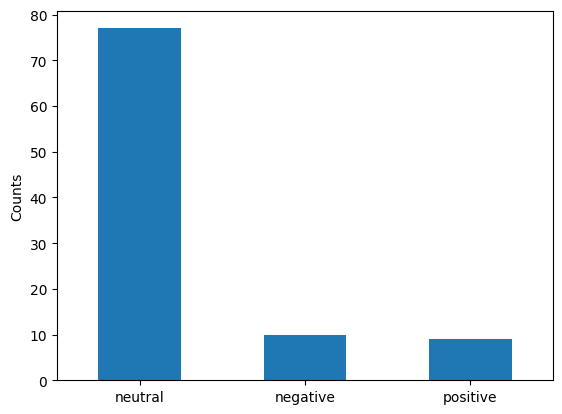

In [92]:
articles_df['sentiment'].value_counts().plot(kind='bar',rot=0)
plt.ylabel('Counts')
plt.Xlabel('Sentiment')
plt.title('Breakdown of semtiment',color='navy',fontsize='11')
plt.show()